In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
import os
import cv2
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D ,Flatten , Dense, Dropout
from keras.utils import to_categorical
from keras.layers import Convolution2D , MaxPooling2D , Dense , Dropout , Flatten


In [37]:
image_size = 200 # this 200 is just a number
#path1 = r"G:\dogcat"
path1=r"G:\DL Paper 1\Datasets\CNN\Shoe Classification\train"
cate = ['Boots' ,'Sandals','Slippers'] ## so index for this is 0 and 1

input_image = []
for i in cate:
    folders = os.path.join(path1 ,i)
    label = cate.index(i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders , image)
        image_array = cv2.imread(image_path)
        image_array =cv2.resize(image_array , (image_size , image_size) )
        input_image.append([image_array , label])

In [38]:
len(input_image)

778

In [39]:
#---------------------------------------------------------
np.random.shuffle(input_image) ## to shuffle the images
#--------------------------------------------------------

X = []
Y = []

for X_values , labels in input_image:
    X.append(X_values)
    Y.append(labels)

#--------------------------------------
X = np.array(X)
Y = np.array(Y)



In [40]:
print(X.shape)
print(Y.shape)

(778, 200, 200, 3)
(778,)


1


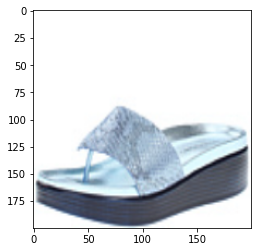

In [41]:
x=10
plt.imshow(X[x])
print(Y[x])

In [42]:
X=X/255

In [43]:
from sklearn.model_selection import train_test_split
X_test,X_train,Y_test , Y_train = train_test_split(X,Y , train_size=0.2 )

In [44]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(623, 200, 200, 3)
(155, 200, 200, 3)
(623,)
(155,)


# build model:without train test split:

In [45]:
model = Sequential()

model.add(Conv2D(filters = 16 , kernel_size =(3,3) , activation ='relu' ))
model.add(MaxPool2D(pool_size =(2,2)))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu' , input_shape = X.shape[1:]))

model.add(Dense(3 , activation= 'softmax'))

#----#-------------
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy' )
#--------------------
model.fit(X , Y , epochs = 10)

Epoch 1/10
25/25 [==============================] - 24s 839ms/step - loss: 9.0475
Epoch 2/10
25/25 [==============================] - 20s 803ms/step - loss: 0.8032
Epoch 3/10
25/25 [==============================] - 20s 806ms/step - loss: 0.4633
Epoch 4/10
25/25 [==============================] - 20s 814ms/step - loss: 0.2241
Epoch 5/10
25/25 [==============================] - 21s 821ms/step - loss: 0.1040
Epoch 6/10
25/25 [==============================] - 21s 854ms/step - loss: 0.0666
Epoch 7/10
25/25 [==============================] - 21s 821ms/step - loss: 0.0433
Epoch 8/10
25/25 [==============================] - 20s 809ms/step - loss: 0.0329
Epoch 9/10
25/25 [==============================] - 21s 825ms/step - loss: 0.0232
Epoch 10/10
25/25 [==============================] - 20s 816ms/step - loss: 0.0231


In [46]:
pred1=model.predict_classes(X)
from sklearn.metrics import confusion_matrix
tab1=confusion_matrix(pred1,Y)
print(tab1)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y,pred1))

[[326   0   0]
 [  0 305   0]
 [  0   1 146]]
0.9987146529562982


In [ ]:
# Above model seems like overfitting 

# model after tain test split

In [47]:

model = Sequential()

model.add(Convolution2D(filters = 32 ,kernel_size=(3,3) , activation="relu" , input_shape = X[0].shape , padding="same" ))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(filters = 64 ,kernel_size=(3,3) , activation="relu" , padding="same" ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(filters = 128 ,kernel_size=(3,3) , activation="relu" , padding="same" ))
model.add(MaxPooling2D(pool_size=(2,2)))
                        

model.add(Flatten())

model.add(Dense( 128 , activation="relu" , ))


model.add(Dropout(0.4))

model.add(Dense( 3 , activation="softmax"))


model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=['accuracy'])

model1 = model.fit(X_train, Y_train , validation_split=0.2, epochs=12 )

Epoch 1/12
16/16 [==============================] - 74s 4s/step - loss: 3.4041 - accuracy: 0.4139 - val_loss: 0.8156 - val_accuracy: 0.7360
Epoch 2/12
16/16 [==============================] - 66s 4s/step - loss: 0.6383 - accuracy: 0.7693 - val_loss: 0.3476 - val_accuracy: 0.8880
Epoch 3/12
16/16 [==============================] - 70s 4s/step - loss: 0.4048 - accuracy: 0.8358 - val_loss: 0.3340 - val_accuracy: 0.8960
Epoch 4/12
16/16 [==============================] - 70s 4s/step - loss: 0.2510 - accuracy: 0.9194 - val_loss: 0.3291 - val_accuracy: 0.8960
Epoch 5/12
16/16 [==============================] - 71s 4s/step - loss: 0.2331 - accuracy: 0.9153 - val_loss: 0.3085 - val_accuracy: 0.9040
Epoch 6/12
16/16 [==============================] - 70s 4s/step - loss: 0.2201 - accuracy: 0.9383 - val_loss: 0.2230 - val_accuracy: 0.9280
Epoch 7/12
16/16 [==============================] - 67s 4s/step - loss: 0.1395 - accuracy: 0.9513 - val_loss: 0.2023 - val_accuracy: 0.9280
Epoch 8/12
16/16 [==

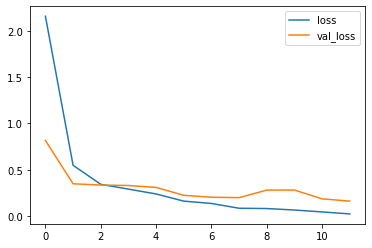

In [48]:
plt.plot(model1.history["loss"] , label="loss")
plt.plot(model1.history["val_loss"] , label="val_loss")
plt.legend()

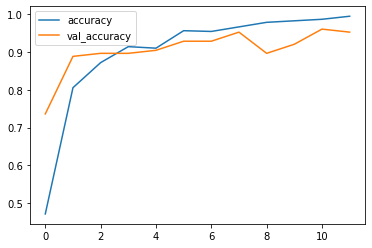

In [49]:
plt.plot(model1.history["accuracy"] , label="accuracy")
plt.plot(model1.history["val_accuracy"] , label="val_accuracy")
plt.legend()

In [50]:
pred1=model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
tab1=confusion_matrix(pred1,Y_test)
print(tab1)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,pred1))

[[64  5  0]
 [ 0 65  2]
 [ 0  3 16]]
0.9354838709677419


# Read test file

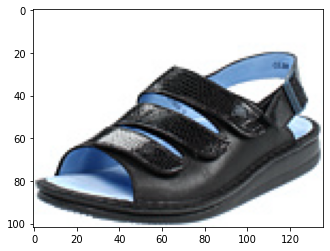

In [51]:
image_size = 200 
path1=r"G:\DL Paper 1\Datasets\CNN\Shoe Classification\test"
input_image = []
for image in os.listdir(path1):
        image_path = os.path.join(path1 , image)
        image_array = cv2.imread(image_path)
        plt.imshow(image_array)
        break
        image_array =cv2.resize(image_array , (image_size , image_size) )
        input_image.append(image_array)

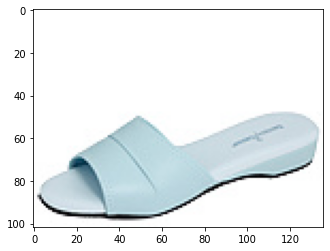

In [52]:
image_size = 200 
path1=r"G:\DL Paper 1\Datasets\CNN\Shoe Classification\test"
input_image = []
for image in os.listdir(path1):
        image_path = os.path.join(path1 , image)
        image_array = cv2.imread(image_path)
        plt.imshow(image_array)
        image_array =cv2.resize(image_array , (image_size , image_size) )
        input_image.append(image_array)

In [53]:
len(input_image)

89

In [54]:
Test_X=[]
for X_val in input_image:
    Test_X.append(X_val)
    # Convert to Array
Test_X=np.array(Test_X)
#Test_X = np.squeeze(Test_X)

In [55]:
pred=model.predict_classes(Test_X)

In [56]:
pred

array([1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       2], dtype=int64)

In [57]:
df = pd.DataFrame(pred)
df.to_csv("ShoePredictio.csv" , index=False)